In [5]:
import os
import shutil

# Create the directory if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# ✅ Correct filename now
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [10]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.dataset_download_files('tongpython/cat-and-dog', path='data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


In [12]:
import os

# List a few files to verify they are there
print(os.listdir("data"))


['test_set', 'training_set']


In [15]:
import os
import shutil

# Create folders if they don't exist
os.makedirs('data/training_set/cats', exist_ok=True)
os.makedirs('data/training_set/dogs', exist_ok=True)
os.makedirs('data/test_set/cats', exist_ok=True)
os.makedirs('data/test_set/dogs', exist_ok=True)

# Move training images
for fname in os.listdir('data/training_set'):
    src = f'data/training_set/{fname}'
    if os.path.isfile(src):  # ✅ Only move files, skip folders
        if fname.startswith('cat'):
            shutil.move(src, f'data/training_set/cats/{fname}')
        elif fname.startswith('dog'):
            shutil.move(src, f'data/training_set/dogs/{fname}')

# Move test images
for fname in os.listdir('data/test_set'):
    src = f'data/test_set/{fname}'
    if os.path.isfile(src):  # ✅ Only move files, skip folders
        if fname.startswith('cat'):
            shutil.move(src, f'data/test_set/cats/{fname}')
        elif fname.startswith('dog'):
            shutil.move(src, f'data/test_set/dogs/{fname}')



In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/training_set'
test_dir = 'data/test_set'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 3 classes.
Found 2023 images belonging to 3 classes.


In [17]:
import os
print("Training folders:", os.listdir("data/training_set"))
print("Test folders:", os.listdir("data/test_set"))


Training folders: ['cats', 'dogs', 'training_set']
Test folders: ['cats', 'dogs', 'test_set']


In [19]:
import shutil

# Remove unwanted subfolders inside training and test sets
shutil.rmtree('data/training_set/training_set', ignore_errors=True)
shutil.rmtree('data/test_set/test_set', ignore_errors=True)


In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [22]:
import os

print("Train - Cats:", len(os.listdir('data/training_set/cats')))
print("Train - Dogs:", len(os.listdir('data/training_set/dogs')))
print("Test - Cats:", len(os.listdir('data/test_set/cats')))
print("Test - Dogs:", len(os.listdir('data/test_set/dogs')))


Train - Cats: 0
Train - Dogs: 0
Test - Cats: 0
Test - Dogs: 0


In [23]:
import os

for root, dirs, files in os.walk('data'):
    for file in files:
        if file.endswith('.jpg'):
            print(os.path.join(root, file))
            break  # print just one match to identify the folder


In [24]:
import os

for root, dirs, files in os.walk("data"):
    level = root.replace("data", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:3]:  # show only first 3 files for brevity
        print(f"{subindent}{f}")


data/
    test_set/
        cats/
        dogs/
    training_set/
        cats/
        dogs/


In [26]:
import os

for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".jpg"):
            print("Found:", os.path.join(root, file))
            break  # only print one to find the location


In [27]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

# Setup Kaggle API
api = KaggleApi()
api.authenticate()

# Download and extract the dataset
api.dataset_download_files('tongpython/cat-and-dog', path='data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


In [28]:
import os

for root, dirs, files in os.walk('data'):
    for file in files:
        if file.endswith('.jpg'):
            print("Found:", os.path.join(root, file))
            break


Found: data\test_set\test_set\cats\cat.4001.jpg
Found: data\test_set\test_set\dogs\dog.4001.jpg
Found: data\training_set\training_set\cats\cat.1.jpg
Found: data\training_set\training_set\dogs\dog.1.jpg


In [30]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data/images")


In [31]:
import os

for root, dirs, files in os.walk("data/images"):
    for file in files:
        if file.endswith(".jpg"):
            print("Found:", os.path.join(root, file))
            break


Found: data/images\test_set\test_set\cats\cat.4001.jpg
Found: data/images\test_set\test_set\dogs\dog.4001.jpg
Found: data/images\training_set\training_set\cats\cat.1.jpg
Found: data/images\training_set\training_set\dogs\dog.1.jpg


In [32]:
import os
import shutil

# Make final target folders
os.makedirs('data/training_set/cats', exist_ok=True)
os.makedirs('data/training_set/dogs', exist_ok=True)
os.makedirs('data/test_set/cats', exist_ok=True)
os.makedirs('data/test_set/dogs', exist_ok=True)

# Move training set images
src_train_cats = 'data/images/training_set/training_set/cats'
src_train_dogs = 'data/images/training_set/training_set/dogs'

for fname in os.listdir(src_train_cats):
    shutil.move(os.path.join(src_train_cats, fname), f'data/training_set/cats/{fname}')

for fname in os.listdir(src_train_dogs):
    shutil.move(os.path.join(src_train_dogs, fname), f'data/training_set/dogs/{fname}')

# Move test set images
src_test_cats = 'data/images/test_set/test_set/cats'
src_test_dogs = 'data/images/test_set/test_set/dogs'

for fname in os.listdir(src_test_cats):
    shutil.move(os.path.join(src_test_cats, fname), f'data/test_set/cats/{fname}')

for fname in os.listdir(src_test_dogs):
    shutil.move(os.path.join(src_test_dogs, fname), f'data/test_set/dogs/{fname}')


In [33]:
print("Train - Cats:", len(os.listdir('data/training_set/cats')))
print("Train - Dogs:", len(os.listdir('data/training_set/dogs')))
print("Test - Cats:", len(os.listdir('data/test_set/cats')))
print("Test - Dogs:", len(os.listdir('data/test_set/dogs')))


Train - Cats: 4001
Train - Dogs: 4006
Test - Cats: 1012
Test - Dogs: 1013


In [35]:
import os

print("Training set folders:", os.listdir('data/training_set'))
print("Test set folders:", os.listdir('data/test_set'))


Training set folders: ['cats', 'dogs', 'training_set']
Test set folders: ['cats', 'dogs', 'test_set']


In [36]:
import shutil

shutil.rmtree('data/training_set/training_set', ignore_errors=True)
shutil.rmtree('data/test_set/test_set', ignore_errors=True)


In [37]:
import os

print("Training set folders:", os.listdir('data/training_set'))
print("Test set folders:", os.listdir('data/test_set'))


Training set folders: ['cats', 'dogs']
Test set folders: ['cats', 'dogs']


In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [39]:
model.fit(train_generator, validation_data=test_generator, epochs=10)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 218s 869ms/step - accuracy: 0.5089 - loss: 31230332.0000 - val_accuracy: 0.5002 - val_loss: 1587832.8750
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 558ms/step - accuracy: 0.5099 - loss: 933274.7500 - val_accuracy: 0.5502 - val_loss: 7092.2461
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 141s 562ms/step - accuracy: 0.5470 - loss: 4766.5737 - val_accuracy: 0.5260 - val_loss: 687.5336
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 558ms/step - accuracy: 0.5271 - loss: 513.8543 - val_accuracy: 0.5368 - val_loss: 174.6113
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 137s 546ms/step - accuracy: 0.5146 - loss: 326.8245 - val_accuracy: 0.5002 - val_loss: 997.1376
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 146s 583ms/step - accuracy: 0.5159 - loss: 501.8018 - val_accuracy: 0.5353 - val_loss: 149.5357
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 556ms/step - accuracy: 0.5353 - loss: 518.4076 - val_accuracy: 0.5002 - val_loss: 1289.9396
Epoch 8/10
251/251 ━━━━━━━━━━━━━━

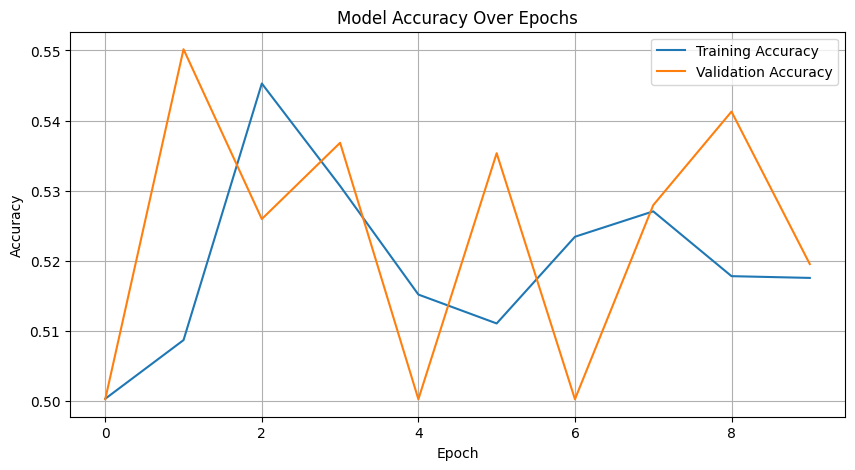

In [40]:
import matplotlib.pyplot as plt

# Get training history
history = model.history.history

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


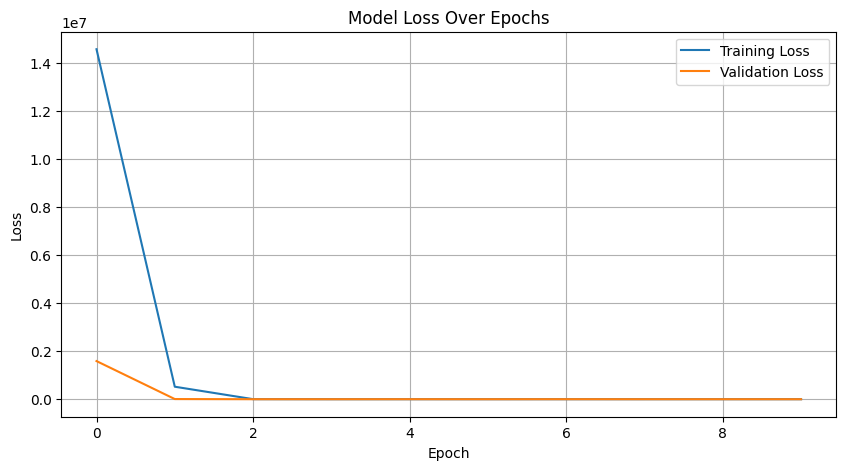

In [41]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
🐱 It's a **Cat** with 100.00% confidence.


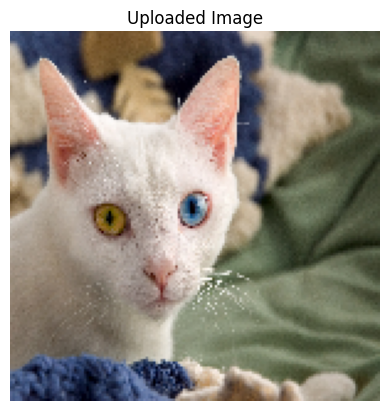

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your uploaded image
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalize like training data

# Predict using the trained model
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("🐶 It's a **Dog** with {:.2f}% confidence.".format(prediction[0][0] * 100))
else:
    print("🐱 It's a **Cat** with {:.2f}% confidence.".format((1 - prediction[0][0]) * 100))

# Display the image
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
🐱 It's a **Cat** with 100.00% confidence.


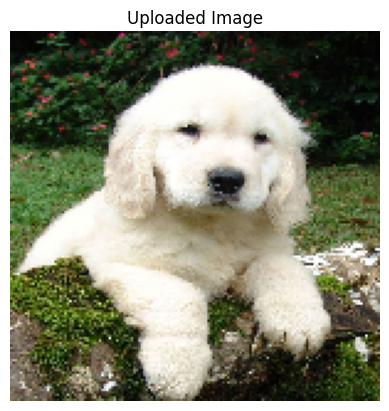

In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the dog image
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("🐶 It's a **Dog** with {:.2f}% confidence.".format(prediction[0][0] * 100))
else:
    print("🐱 It's a **Cat** with {:.2f}% confidence.".format((1 - prediction[0][0]) * 100))

# Show image
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()


In [44]:
print("Cats:", len(os.listdir("data/training_set/cats")))
print("Dogs:", len(os.listdir("data/training_set/dogs")))


Cats: 4001
Dogs: 4006


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Better data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/training_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'data/test_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Stronger CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
🐶 It's a **Dog** with 95.19% confidence.


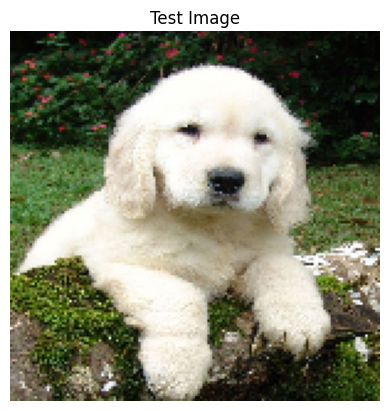

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 🔁 Change to 'cat.jpg' or 'dog.jpg'
img_path = 'dog.jpg'

# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)

# Result
if prediction[0][0] > 0.5:
    print("🐶 It's a **Dog** with {:.2f}% confidence.".format(prediction[0][0] * 100))
else:
    print("🐱 It's a **Cat** with {:.2f}% confidence.".format((1 - prediction[0][0]) * 100))

# Show image
plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()


In [49]:
model.save('cat_dog_cnn_model.keras')


In [51]:
# Evaluate model on test set
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.7686 - loss: 0.5151
✅ Test Accuracy: 75.48%
📉 Test Loss: 0.5239


In [53]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']


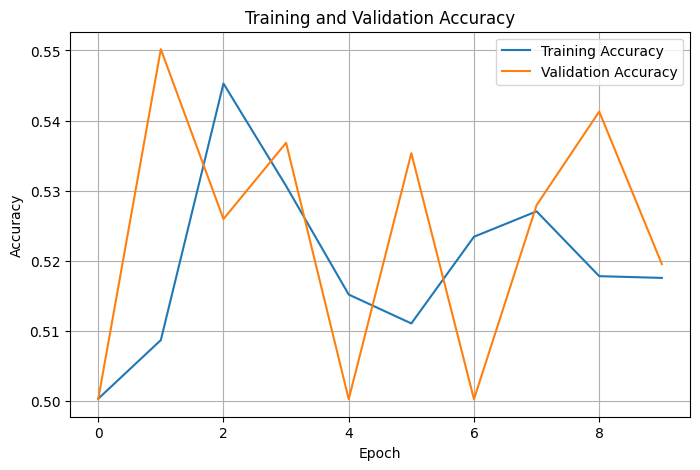

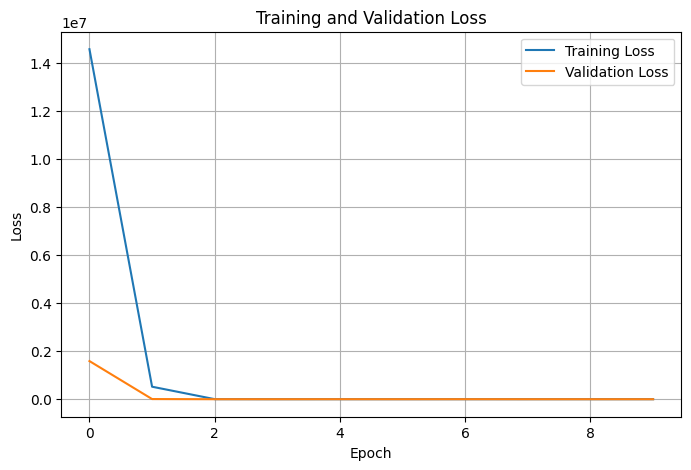

In [54]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
model.fit(train_generator, validation_data=test_generator, epochs=20)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 240s 952ms/step - accuracy: 0.7018 - loss: 0.5672 - val_accuracy: 0.6901 - val_loss: 0.5969
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 231s 921ms/step - accuracy: 0.7134 - loss: 0.5636 - val_accuracy: 0.7682 - val_loss: 0.4951
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 232s 923ms/step - accuracy: 0.7309 - loss: 0.5391 - val_accuracy: 0.7751 - val_loss: 0.4937
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 231s 919ms/step - accuracy: 0.7298 - loss: 0.5384 - val_accuracy: 0.7924 - val_loss: 0.4705
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 232s 923ms/step - accuracy: 0.7420 - loss: 0.5246 - val_accuracy: 0.7909 - val_loss: 0.4627
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 246s 978ms/step - accuracy: 0.7332 - loss: 0.5293 - val_accuracy: 0.7776 - val_loss: 0.4820
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 231s 920ms/step - accuracy: 0.7455 - loss: 0.5200 - val_accuracy: 0.7998 - val_loss: 0.4452
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3243s 13s/step - accuracy: 0.7496 - 

In [56]:
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Final Test Accuracy: {accuracy * 100:.2f}%")
print(f"📉 Final Test Loss: {loss:.4f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.8498 - loss: 0.3659
✅ Final Test Accuracy: 85.71%
📉 Final Test Loss: 0.3494


In [57]:
model.save('cat_dog_classifier.keras')  # Recommended format


In [58]:
from tensorflow.keras.models import load_model
model = load_model('cat_dog_classifier.keras')


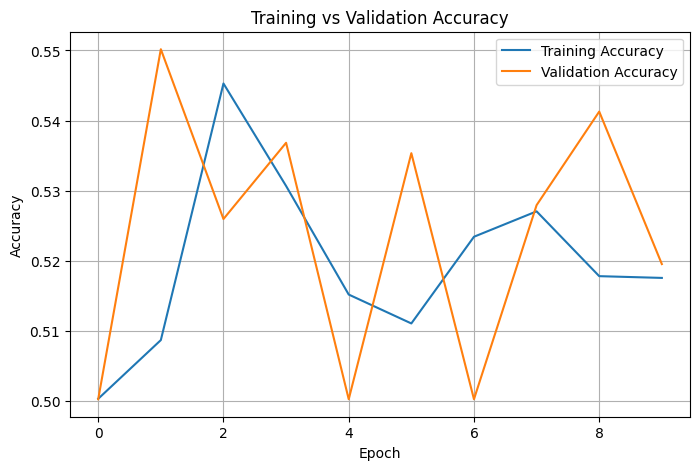

In [61]:
import matplotlib.pyplot as plt

acc = history['accuracy']
val_acc = history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


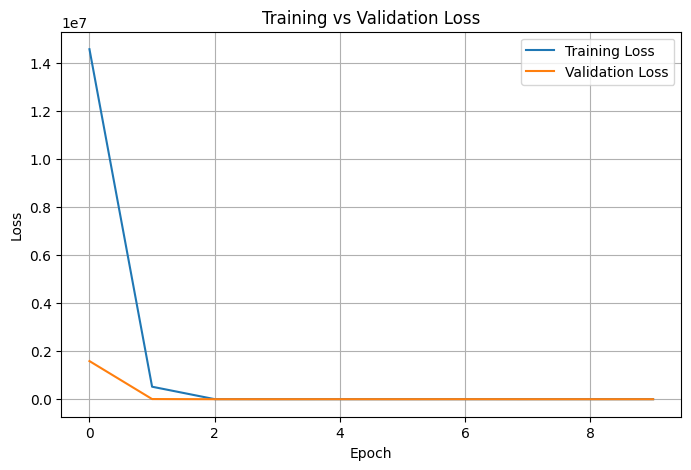

In [62]:
loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 197s 777ms/step - accuracy: 0.8014 - loss: 0.4419 - val_accuracy: 0.8660 - val_loss: 0.3320
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 195s 776ms/step - accuracy: 0.8114 - loss: 0.4314 - val_accuracy: 0.8537 - val_loss: 0.3595
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 195s 776ms/step - accuracy: 0.8184 - loss: 0.4108 - val_accuracy: 0.8087 - val_loss: 0.4689
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 193s 770ms/step - accuracy: 0.8188 - loss: 0.4232 - val_accuracy: 0.8211 - val_loss: 0.4431
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 194s 772ms/step - accuracy: 0.8113 - loss: 0.4155 - val_accuracy: 0.7968 - val_loss: 0.5508
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 202s 769ms/step - accuracy: 0.8184 - loss: 0.4045 - val_accuracy: 0.8730 - val_loss: 0.3254
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 193s 767ms/step - accuracy: 0.8263 - loss: 0.3890 - val_accuracy: 0.8581 - val_loss: 0.3460
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 191s 762ms/step - accuracy: 0.8258 -

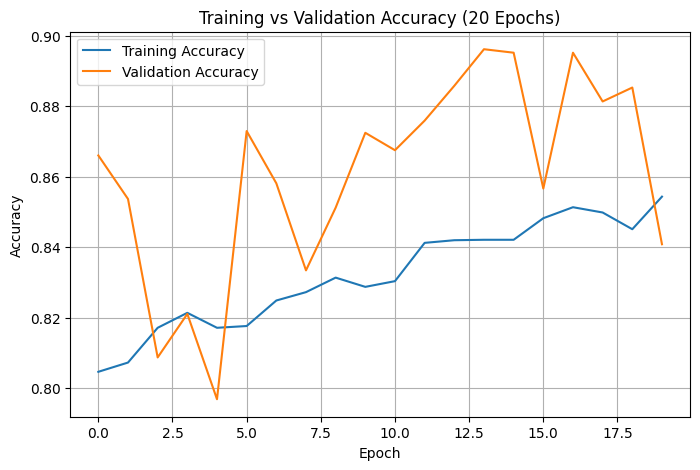

In [64]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
model.save("cat_dog_model.keras")  # or .h5 for legacy


In [66]:
from tensorflow import keras
model = keras.models.load_model("cat_dog_model.keras")
